In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
import math as m
import statistics as st
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm 
from scipy.stats import t
from itertools import combinations,combinations_with_replacement,permutations,product
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("DS1_C8_Computers_Data_Project.csv")
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [3]:
Num_col=df.select_dtypes(exclude="object")
Num_col

,index,price,speed,hd,ram,screen,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,94,94,1
1,2,1795,33,85,2,14,94,94,1
2,3,1595,25,170,4,15,94,94,1
3,4,1849,25,170,8,14,94,94,1
4,5,3295,33,340,16,14,94,104,1
...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,39,70,35
6255,6256,2223,66,850,16,15,39,70,35
6256,6257,2654,100,1200,24,15,39,70,35
6257,6258,2195,100,850,16,15,39,70,35


In [4]:
Cat_col=df.select_dtypes(include="object")
Cat_col

,cd,multi,premium
0,no,no,yes
1,no,no,yes
2,no,no,yes
3,no,no,no
4,no,no,yes
...,...,...,...
6254,no,no,yes
6255,yes,yes,yes
6256,yes,no,yes
6257,yes,no,yes


In [5]:
print(tabulate({"Numerical":Num_col,"Categorical":Cat_col},headers=["Numerical","Categorical"]))

Numerical    Categorical
-----------  -------------
index        cd
price        multi
speed        premium
hd
ram
screen
ads_2022
ads_2023
trend


In [6]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [7]:
data=[]
for col in Num_col:
    lo=[]
    uo=[]
    column_df=pd.Series(Num_col[col])
    Maximum=max(column_df)
    Minimum=min(column_df)
    Range=Maximum-Minimum
    Q1=column_df.quantile(0.25)
    Q2=column_df.quantile(0.50)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in Num_col[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,[[lo,uo]]))
columns_data=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
pd_data=pd.DataFrame(data,columns=columns_data)
pd_data
    

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,index,6259,1,6258,1565.5,3130.0,4694.5,3129.0,9388.00,-3128.00,"[[[], []]]"
1,price,5399,949,4450,1794.0,2144.0,2595.0,801.0,3796.50,592.50,"[[[], [4395, 4195, 3995, 3895, 3990, 4020, 389..."
2,speed,100,25,75,33.0,50.0,66.0,33.0,115.50,-16.50,"[[[], []]]"
3,hd,2100,80,2020,214.0,340.0,528.0,314.0,999.00,-257.00,"[[[], [1000, 1000, 1370, 1370, 1100, 1100, 110..."
4,ram,32,2,30,4.0,8.0,8.0,4.0,14.00,-2.00,"[[[], [16, 16, 16, 16, 16, 16, 16, 16, 16, 16,..."
5,screen,17,14,3,14.0,14.0,15.0,1.0,16.50,12.50,"[[[], [17, 17, 17, 17, 17, 17, 17, 17, 17, 17,..."
6,ads_2022,339,39,300,162.5,246.0,275.0,112.5,443.75,-6.25,"[[[], []]]"
7,ads_2023,339,39,300,162.0,246.0,283.0,121.0,464.50,-19.50,"[[[], []]]"
8,trend,35,1,34,10.0,16.0,21.5,11.5,38.75,-7.25,"[[[], []]]"


In [8]:
price=df[["price"]]
price

,price
0,1499
1,1795
2,1595
3,1849
4,3295
...,...
6254,1690
6255,2223
6256,2654
6257,2195


In [9]:
sample_data_5=price.sample(n=5,replace=True,random_state=1)
sample_data_5

,price
5157,1758
235,2295
3980,2095
5192,1528
905,1899


In [10]:
sample_data_70=price.sample(n=70,replace=True,random_state=1,ignore_index=True)
sample_data_70

,price
0,1758
1,2295
2,2095
3,1528
4,1899
...,...
65,2208
66,1795
67,2690
68,1590


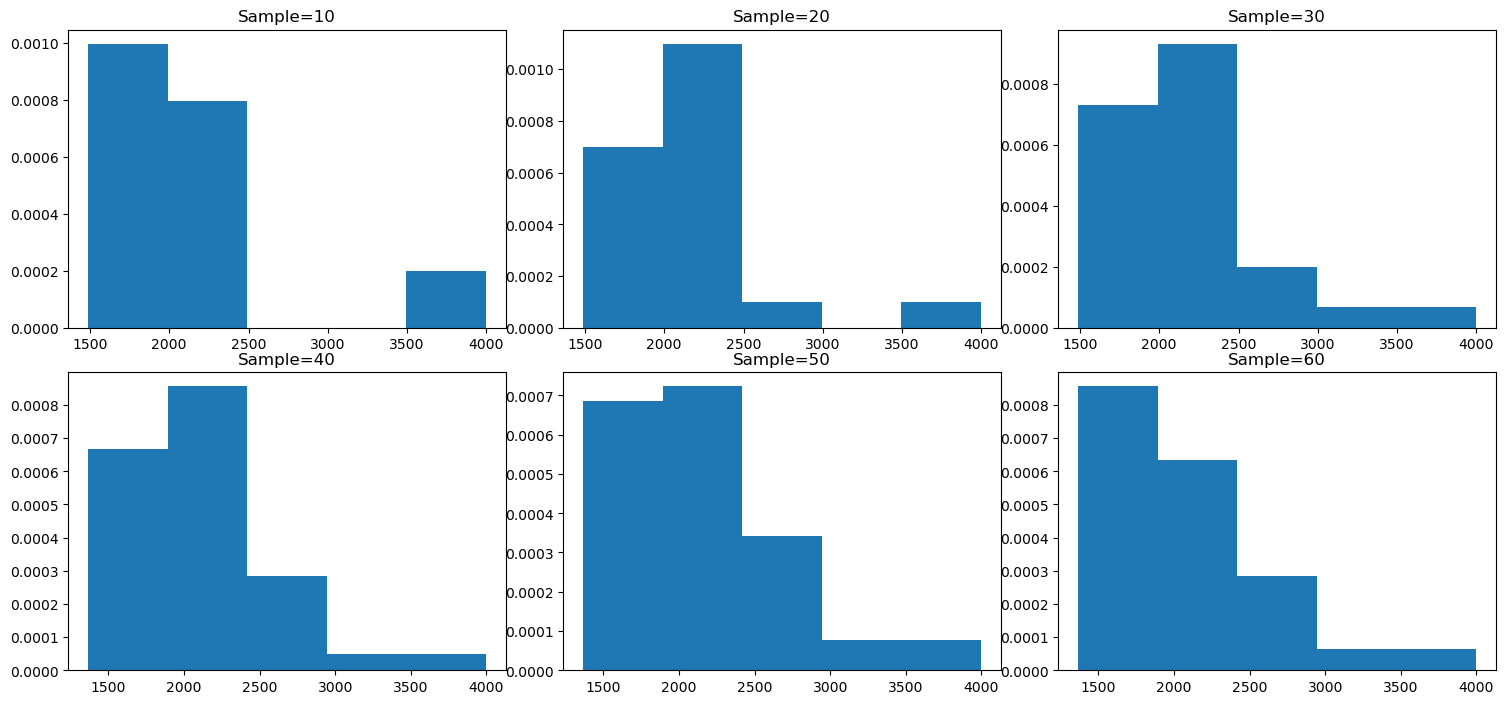

In [11]:
# My Method
# Task 3(1)
Nums=[10,20,30,40,50,60]
ee=[]
fig,ax=plt.subplots(2,3,figsize=(15,7))
k=0
plt.tight_layout()
for i in Nums:
    ss=df.sample(n=i,replace=True,random_state=1)
    ee.append(ss["price"])
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].hist(ee[k],density=True,bins=5)
        ax[i,j].set_title(label="Sample="+str(len(ee[k])))
        k=k+1
plt.show()

In [143]:
sample_10=price.sample(n=10,replace=True,random_state=1)
sample_20=price.sample(n=20,replace=True,random_state=1)
sample_30=price.sample(n=30,random_state=1,replace=True)
sample_40=price.sample(n=40,random_state=1,replace=True)
sample_50=price.sample(n=50,replace=True,random_state=1)
sample_60=price.sample(n=60,replace=True,random_state=1)
sample_10_mean=st.mean(sample_10["price"])
print("The mean value for the sample 10 is:",sample_10_mean) 
sample_20_mean=st.mean(sample_20["price"])
print("The mean value for the sample 20  is:",sample_20_mean)
sample_30_mean=st.mean(sample_30["price"])
print("The mean value for the sample 30 is:",sample_30_mean)
sample_40_mean=st.mean(sample_40["price"])
print("The mean value for the sample 40 is:",sample_40_mean)
sample_50_mean=st.mean(sample_50["price"])
print("The mean value for the sample 50 is:",sample_50_mean)
sample_60_mean=st.mean(sample_60["price"])
print("The mean value for the sample 60 is:",sample_60_mean)

The mean value for the sample 10 is: 2126.7
The mean value for the sample 20  is: 2145.35
The mean value for the sample 30 is: 2169.766666666667
The mean value for the sample 40 is: 2122.65
The mean value for the sample 50 is: 2172.2
The mean value for the sample 60 is: 2092.5666666666666


# Task 3(2) Interpretation
""" From this Task we can interpret it that there is a changes in a distrubution because the sample size is different"""

In [153]:
sample_data=pd.DataFrame()
for i in range(0,20):
    sample_data["Sample"+str(i)]=df["price"].sample(n=40,replace=True).reset_index(drop=True)
sample_data

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19
0,2099,2590,1690,2294,2899,1544,3515,1915,3265,1818,1858,2054,1945,3044,1795,3094,1399,3895,2940,1290
1,1890,1944,2995,3595,1595,1848,2190,1199,2394,1749,2258,2590,1345,2044,2294,2790,1795,3089,2099,2199
2,2390,2109,1644,1795,2899,1865,1995,1490,1495,2490,1445,2590,2065,2065,2645,2095,1854,2059,2490,2845
3,2404,1794,1499,1694,1490,2373,2099,3195,3443,1918,2295,3290,2490,1790,2690,2895,2854,3354,1495,2695
4,1449,2890,1495,2890,3495,3175,3499,2794,2394,2478,1399,1495,2249,2194,2198,1195,1599,2595,2688,2995
5,2699,2199,2249,2384,2595,1670,2199,1799,3295,1499,1559,2254,3594,2394,2294,2595,2544,1195,2395,3290
6,1960,1339,1798,2550,2320,1899,2644,1735,1994,1499,1899,2940,1808,2309,1795,1499,1639,1894,2790,1745
7,1595,2544,2104,2899,1829,1395,1895,2290,1744,2108,2449,3399,2489,2904,1995,2374,2999,1495,3039,2154
8,1904,1618,2645,1288,2290,1590,2495,1195,2199,2328,2094,1854,2145,2279,2604,1799,2299,2988,1444,2449
9,2244,2190,2090,2290,2058,3135,1790,1795,2399,2129,1689,1899,2420,2427,1990,1498,3609,1798,2529,1890


In [174]:
import statistics as st
EE = sample_data.columns
column_means = {}
for i in EE:
    column_means[i] = st.mean(sample_data[i])
column_means

{'Sample0': 2158.775,
 'Sample1': 2289.5,
 'Sample2': 2190.725,
 'Sample3': 2308.75,
 'Sample4': 2380.375,
 'Sample5': 2165.625,
 'Sample6': 2236.3,
 'Sample7': 2190.475,
 'Sample8': 2355.625,
 'Sample9': 2226.4,
 'Sample10': 2094.05,
 'Sample11': 2212.75,
 'Sample12': 2248.175,
 'Sample13': 2396.475,
 'Sample14': 2227.55,
 'Sample15': 2107.75,
 'Sample16': 2169.45,
 'Sample17': 2322.525,
 'Sample18': 2255.7,
 'Sample19': 2225.25}

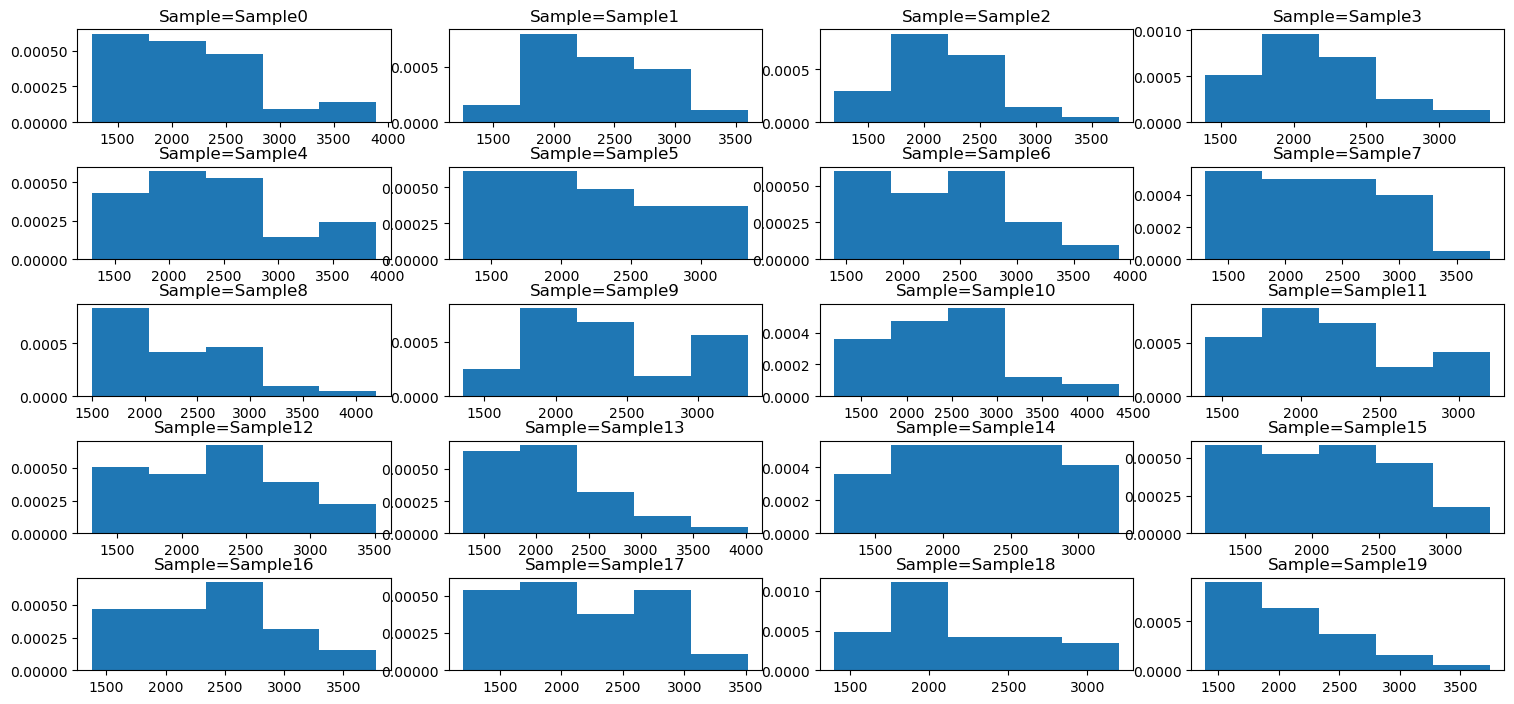

In [14]:
sample_namess=sample_data.columns
fig,ax=plt.subplots(5,4,figsize=(15,7))
k=0
plt.tight_layout()
for i in range(0,5):
    for j in range(0,4):
        ax[i,j].hist(sample_data[sample_namess[k]],bins=5,density=True)
        ax[i,j].set_title(label="Sample="+str(sample_namess[k]))
        k=k+1
plt.show()

In [15]:
sample_3130=df.sample(n=100,replace=True,random_state=1)
sample_3130

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5157,5158,1758,50,545,4,17,yes,no,yes,182,182,24
235,236,2295,66,130,4,14,no,no,yes,100,100,3
3980,3981,2095,66,426,8,14,yes,no,yes,273,273,18
5192,5193,1528,33,428,4,17,no,no,yes,182,182,24
905,906,1899,25,120,4,14,no,no,no,249,249,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,1744,33,107,2,14,no,no,yes,259,259,11
1795,1796,1644,25,107,2,14,no,no,yes,259,259,11
2944,2945,2645,66,424,8,17,yes,no,yes,267,267,15
5373,5374,2339,33,212,8,17,yes,yes,yes,158,158,25


In [16]:
# Task 3(c)
p_mean=st.mean(price["price"])
print("The population mean for the price:",p_mean)
p_std=st.stdev(price["price"])
print("The population standard deviation for the price is:",p_std)
p_skew=skew(price["price"],bias=True)
print("The skewness for the price is:",p_skew)
p_kurtosis=kurtosis(price["price"],bias=True)
print("The population kurtosis for the price is:",p_kurtosis)

The population mean for the price: 2219.576609682058
The population standard deviation for the price is: 580.8039556527063
The skewness for the price is: 0.7115541683835676
The population kurtosis for the price is: 0.7288752074124178


In [17]:
sample_3130_mean=st.mean(sample_3130["price"])
print("The sample mean for the price is:",sample_3130_mean)
sample_3130_std=st.stdev(sample_3130["price"])
print("The sample standard deviation for the price is:",sample_3130_std)
sample_3130_skew=skew(sample_3130["price"])
print("The sample skew for the price is:",sample_3130_skew)
sample_3130_kurtosis=kurtosis(sample_3130["price"])
print("The sample kurtosis for the price is:",sample_3130_kurtosis)

The sample mean for the price is: 2181.61
The sample standard deviation for the price is: 570.175126295829
The sample skew for the price is: 0.9263107653468952
The sample kurtosis for the price is: 0.7879175552511528


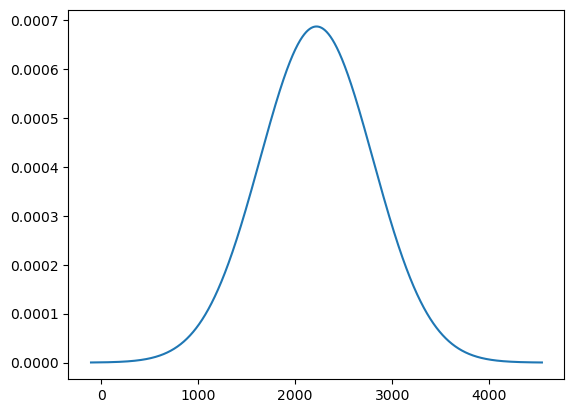

In [18]:
# Task 3(3)
lower_p=p_mean-4*p_std
upper_p=p_mean+4*p_std
Arr=np.arange(lower_p,upper_p)
plt.plot(Arr,norm.pdf(Arr,p_mean,p_std))

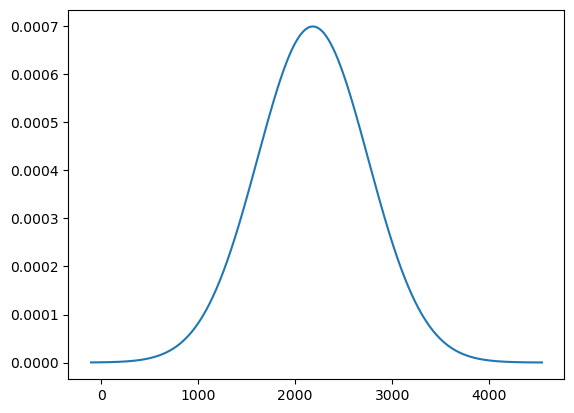

In [19]:
lower_p4=sample_3130_mean-4*sample_3130_std
upper_p4=sample_3130_mean+4*sample_3130_std
Arr3=np.arange(lower_p4,upper_p4)
plt.plot(Arr,norm.pdf(Arr,sample_3130_mean,sample_3130_std))

In [20]:
# Task 2(A)
print("The average the price for all computer is:",p_mean) 

The average the price for all computer is: 2219.576609682058


In [21]:
# Task 2(B)
# Simple Random Sampling With Replacement
sample_price_5=price.sample(n=5,replace=True,random_state=1)
sample_price_5

,price
5157,1758
235,2295
3980,2095
5192,1528
905,1899


In [22]:
print("The average price for sampling with replacement technique is:",st.mean(sample_price_5["price"]))

The average price for sampling with replacement technique is: 1915


In [23]:
# Simple Random Sampling Without Replacement
Sample_price_5_without=price.sample(n=5,random_state=1)
Sample_price_5_without

,price
895,2394
3438,2394
1564,2498
1662,3094
1122,4694


In [24]:
print("The average price for sampling without replacement technique is:",st.mean(Sample_price_5_without["price"]))

The average price for sampling without replacement technique is: 3014.8


In [25]:
# Stratified Sampling
grouped_data=df.groupby(["premium"])
premium=df.premium.unique()
ss=[]
for i in premium:
    d_data=grouped_data.get_group(i)
    sample_data=d_data.sample(n=5,random_state=1,replace=True)
    ss.append(sample_data)
p=pd.concat(ss)
p
p_yes=p[p["premium"]=="yes"]
p_yes
p_yes_mean=st.mean(p_yes["price"])
print("The sample mean(yes) for the stratified sampling is:",p_yes_mean)
p_no=p[p["premium"]=="no"]
p_no_mean=st.mean(p_no["price"])
print("The sample mean for no premium for the stratified sampling is:",p_no_mean)

The sample mean(yes) for the stratified sampling is: 2205.8
The sample mean for no premium for the stratified sampling is: 2208.6


In [26]:
# Clustered Sampling
grouped_data=df.groupby(["premium"])
P_Yes=["yes"]
ee=[]
for s in P_Yes:
    d_datas=grouped_data.get_group(s)
    sample_datas=d_datas.sample(n=10,replace=True,random_state=1)
    ee.append(sample_datas)
rr=pd.concat(ee)
rr
Mean_p=st.mean(rr["price"])
print("The mean for the clustered Sampling is:",Mean_p)

The mean for the clustered Sampling is: 2125.9


In [27]:
# systematic sampling:
systematic_sampling=df[::5]
systematic_sampling
sys_mean=st.mean(systematic_sampling["price"])
print("The average price for the systematic Sampling is:",sys_mean)

The average price for the systematic Sampling is: 2226.5103833865815


In [28]:
# Task 2(C)
premium_data_yes=df[df["premium"]=="yes"]
premium_data_yes

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
5,6,3695,66,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [29]:
Premium_yes_mean=st.mean(premium_data_yes["price"])
print("The premium price is :",Premium_yes_mean)

The premium price is : 2204.148397379139


In [30]:
premium_data_no=df[df["premium"]=="no"]
premium_data_no

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
3,4,1849,25,170,8,14,no,no,no,94,94,1
54,55,2199,33,212,8,14,no,no,no,94,94,1
79,80,1629,25,80,8,14,no,no,no,94,94,1
85,86,1999,33,120,8,14,no,no,no,94,94,1
169,170,1999,33,120,8,14,no,no,no,95,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6045,6046,1949,66,420,8,15,no,no,no,52,52,31
6100,6101,1949,66,420,8,15,no,no,no,51,51,32
6166,6167,1949,66,420,8,15,no,no,no,40,40,33
6190,6191,1699,66,630,8,15,no,no,no,39,39,34


In [31]:
premium_data_no_mean=st.mean(premium_data_no["price"])
premium_data_no_mean

2361.9346405228757

In [32]:
sample_3130_yes=premium_data_yes.sample(n=5,random_state=1)
sample_3130_yes
sample_3130_mean=st.mean(sample_3130_yes["price"])
print("The sample mean for simple random sampling without replacement for premium category is:",sample_3130_mean)
sample_3130_no=premium_data_no.sample(n=5,random_state=1)
sample_3130_no_mean=st.mean(sample_3130_no["price"])
print("The sample mean for non premium category is:",sample_3130_no_mean)

The sample mean for simple random sampling without replacement for premium category is: 2143.4
The sample mean for non premium category is: 2052.8


In [33]:
# Task 1(a)
result = df[(df["screen"] == 14) & (df["ram"] >= 8) & (df["speed"] > 33)]
result

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5,6,3695,66,340,16,14,no,no,yes,94,104,1
8,9,2225,50,210,8,14,no,no,yes,94,104,1
11,12,2605,66,210,8,14,no,no,yes,94,104,1
14,15,2699,50,212,8,14,no,no,yes,94,104,1
19,20,4395,66,452,8,14,no,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6238,6239,1744,66,528,8,14,no,no,yes,39,70,35
6240,6241,1595,100,528,8,14,no,no,yes,39,70,35
6246,6247,1554,66,528,8,14,no,no,yes,39,70,35
6247,6248,1654,100,528,8,14,no,no,yes,39,70,35


In [34]:
len_result=len(result)
print(len_result)
total_customers=len(df)
print(total_customers)
probability_customers=len_result/total_customers
print(f"The probaility of requirements is:{probability_customers:.2%}")

1003
6259
The probaility of requirements is:16.02%


In [35]:
# Task 1(b) (i)
total_premium = len(df)
print(total_premium)
premium_yes = len(df[df["premium"] == "yes"])
probability = premium_yes / total_premium
print(f"The probability of selling a premium computer is: {probability:.2%}")

6259
The probability of selling a premium computer is: 90.22%


In [36]:
# Task 1 (b) (ii)
len_cd=len(df[df["premium"]=="yes"])
print(len_cd)
cd=len(df[(df["premium"]=="yes") &(df["cd"]=="yes")])
print(cd)
probability_cd=cd/len_cd
print(f"The probaility for premium and cd is:{probability_cd:.2%}")

5647
2824
The probaility for premium and cd is:50.01%


In [37]:
# Task 1(c) (i)
len_df=len(df)
screen=len(df[(df["premium"]=="yes") & (df["screen"]>15)])
probbability_of_screen_and_premium=screen/len_df
print(f"The probability of premium and screen is {probbability_of_screen_and_premium:.2%}")

The probability of premium and screen is 8.47%


In [38]:
# Task 1(c) (ii)
len_df3=len(df[df["premium"]=="no"])
not_premium=len(df[(df["premium"]=="no") & (df["screen"]<=14)])
not_premium
probability_e=not_premium/len_df3
print(f"The probability of cd and premium is:{probability_e:.2%}")

The probability of cd and premium is:69.12%


In [122]:
# Task 1(d)(I)
total_computers = len(df)
cd_and_multi = len(df[(df["cd"] == "yes") & (df["multi"] == "yes")])
print(cd_and_multi)
joint_probability = cd_and_multi / total_computers
print(f"The joint probability of having both a CD player and a multimedia kit is: {joint_probability:.2%}")


873
The joint probability of having both a CD player and a multimedia kit is: 13.95%


In [124]:
# Task 1(d) (ii)
cd_only = len(df[df["cd"] == "yes"])
print(cd_only)
conditional_probability = cd_and_multi / cd_only
print(f"The conditional probability of having a multimedia kit given a CD player is: {conditional_probability:.2%}")


2908
The conditional probability of having a multimedia kit given a CD player is: 30.02%


# PROJECT 2

In [241]:
samp1=df[df["premium"]=="yes"]
samp1 = samp1.sample(n=40,replace=True,random_state=1)
t1a_s_mean = st.mean(samp1['ads_2023'])
print('sample mean for ad budget in 2023:',t1a_s_mean)

sample mean for ad budget in 2023: 217.7


In [188]:
alpha=0.05
S=74.83
mu=221.3
x=217.7
n=40
""" In this N  value is greater than the 30 So we can considered as Z - HYPOTHESIS """

' In this N  value is greater than the 30 So we can considered as Z - HYPOTHESIS '

In [190]:
z_statistics=((x-mu)/(S/m.sqrt(n)))
print("The z Statistics values are :",z_statistics)
p_value=norm.sf(abs(z_statistics))
print("The p_value are:",p_value)
z_critical=norm.ppf(1-alpha)
print("The z_critical value are:",z_critical)

The z Statistics values are : -0.3042683302580847
The p_value are: 0.3804617354070354
The z_critical value are: 1.6448536269514722


In [45]:
# Task 3(A)
Premium_yes34=df[df["premium"]=="yes"]
Premium_yes34
premium_yes_55_sample=Premium_yes34.sample(n=25,replace=True,random_state=1)
premium_yes_55_sample
Premium_yes_34_mean=st.mean(premium_yes_55_sample["price"])
print("The premium category mean is:",Premium_yes_34_mean)
Premium_yes_34_std=st.stdev(premium_yes_55_sample["price"])
print("The standard deviation for the premium category is:",Premium_yes_34_std)
Premium_yes_34_variance=Premium_yes_34_std**2
print("The variance for the premium Category is:",Premium_yes_34_variance)
dof=25-1
print("The degree of Freedom is:",dof)

The premium category mean is: 2113.08
The standard deviation for the premium category is: 495.66184037103363
The variance for the premium Category is: 245680.66000000003
The degree of Freedom is: 24


In [46]:
n=25
alpha=0.05
mu=2200
x=2113.08
s=495.66
dof=24
""" The n value is lesser than the 30 We considered as T - HYPOTHESIS"""

' The n value is lesser than the 30 We considered as T - HYPOTHESIS'

In [47]:
t_statisitcs=((x-mu)/(s/m.sqrt(n)))
print("The t_statistics value is :",t_statisitcs)

The t_statistics value is : -0.876810717023767


In [48]:
t_value=t.sf(abs(t_statisitcs),dof)*2
print("The t_value is:",t_value)

The t_value is: 0.3892819193231102


In [49]:
t_critical=t.ppf(1-alpha/2,dof)
print("The t_critical value is:",t_critical)

The t_critical value is: 2.0638985616280205


In [198]:
# Task 3(b)
P_yes=df[df["premium"]=="yes"]
P_yes
P_yes_Sample=P_yes.sample(n=25,replace=True,random_state=1)
P_yes_Sample_mean=st.mean(P_yes_Sample["price"])
print("The sample mean for the 40 sample is:",P_yes_Sample_mean)
P_yes_Sample_std=st.stdev(P_yes_Sample["price"])
print("The sample standard deviation for the 40 sample is:",P_yes_Sample_std)
P_yes_Sample_Variance=P_yes_Sample_std**2
print("The sample variance for the sample 40 is:",P_yes_Sample_Variance)
P_yes_len=len(

The sample mean for the 40 sample is: 2113.08
The sample standard deviation for the 40 sample is: 495.66184037103363
The sample variance for the sample 40 is: 245680.66000000003


In [210]:
P_no=df[df["premium"]=="no"]
P_no

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
3,4,1849,25,170,8,14,no,no,no,94,94,1
54,55,2199,33,212,8,14,no,no,no,94,94,1
79,80,1629,25,80,8,14,no,no,no,94,94,1
85,86,1999,33,120,8,14,no,no,no,94,94,1
169,170,1999,33,120,8,14,no,no,no,95,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6045,6046,1949,66,420,8,15,no,no,no,52,52,31
6100,6101,1949,66,420,8,15,no,no,no,51,51,32
6166,6167,1949,66,420,8,15,no,no,no,40,40,33
6190,6191,1699,66,630,8,15,no,no,no,39,39,34


In [220]:
P_no_Sample

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
1015,1016,2109,33,120,4,14,no,no,no,298,298,8
2487,2488,2348,33,245,4,14,no,no,no,216,216,13
1422,1423,2094,33,120,4,14,yes,no,no,246,246,9
1952,1953,2674,33,245,8,14,yes,no,no,259,259,11
1881,1882,1818,25,212,4,14,no,no,no,259,259,11
5457,5458,2063,66,270,4,14,no,no,no,152,152,26
4160,4161,3208,66,270,4,15,no,no,no,225,225,19
3274,3275,2249,66,212,4,14,no,no,no,307,307,16
2694,2695,2609,33,212,4,17,no,no,no,292,292,14
2098,2099,2134,25,245,4,14,no,no,no,275,275,12


In [225]:
P_no_Sample=P_no.sample(n=25,replace=True,random_state=1)
P_no_sample_mean=st.mean(P_no_Sample["price"])
print("The sample mean for the non premium category is:",P_no_sample_mean)
P_no_Sample_std=st.stdev(P_no_Sample["price"])
print("The sample standard deviation for the non premium category is:",P_no_Sample_std)
P_no_Sample_variance=P_no_Sample_std**2
print("The sample variance for the non premium category is:",P_no_Sample_variance)
DOF=25+25-2
print("The degree of Freedom is:",DOF)

The sample mean for the non premium category is: 2272.96
The sample standard deviation for the non premium category is: 528.077131361193
The sample variance for the non premium category is: 278865.45666666667
The degree of Freedom is: 48


In [235]:
n1=25
n2=25
v1= 245680.66
v2=278865.45
x1=2113.08
x2=2272.96

In [239]:
noise = m.sqrt(v1*(n1-1) + v2*(n2-1))*m.sqrt(1/n1 + 1/n2)
signal = abs(x1-x2)
t_statistic=signal/noise
print('t-statistic =',t_statistic)
p_value=t.sf(abs(t_statistic),DOF)*2
print("The p_value is ", p_value)
t_critical = t.ppf(1-0.025, DOF)
print('t-critical =',t_critical)

t-statistic = 0.1593131739001752
The p_value is  0.8740906133062863
t-critical = 2.010634757624232


In [55]:
# Task 2
cd_yes=df[df["cd"]=="yes"]
cd_yes
cd_yes_mean=st.mean(cd_yes["price"])
print("The mean for the cd category type computer is:",cd_yes_mean)
cd_yes_std=st.stdev(cd_yes["price"])
print("The standard deviation for cd type category computer is:",cd_yes_std)
cd_yes_variance=cd_yes_std**2
print("The variance for the cd type computer category is:",cd_yes_variance)
cd_yes_len=len(cd_yes['price'])
print("The len for the cd type category is:",cd_yes_len)

The mean for the cd category type computer is: 2342.6055708390645
The standard deviation for cd type category computer is: 527.4477919505294
The variance for the cd type computer category is: 278201.173233489
The len for the cd type category is: 2908


In [56]:
cd_no=df[df["cd"]=="no"]
cd_no
cd_no_mean=st.mean(cd_no["price"])
print("The mean for the non cd type category is:",cd_no_mean)
cd_no_std=st.stdev(cd_no["price"])
print("The standard deviation for the non cd type category is:",cd_no_std)
cd_no_variance=cd_no_std**2
print("The variance for the non cd type category is:",cd_no_variance)
cd_no_len=len(cd_no["price"])
print("The len for the non cd type category is:",cd_no_len)

The mean for the non cd type category is: 2112.8119964189796
The standard deviation for the non cd type category is: 603.494237086272
The variance for the non cd type category is: 364205.29419634154
The len for the non cd type category is: 3351


# So here the  n (i.e len value) is greater than the 30
So we can Considered as a Z - HYPOTHESIS

In [58]:
s1_mean=2342.60
s2_mean=2112.81
alpha=0.05
n1=2908
n2=3351
v1=278201.17
v2=364205.29

In [59]:
z_statistics=((s1_mean-s2_mean)/(m.sqrt((v1/n1)+(v2/n2))))
print("The z_statistics value are :",z_statistics)

The z_statistics value are : 16.074613152884513


In [60]:
p_value=norm.sf(abs(z_statistics))*2
print("The p_value are:",p_value)

The p_value are: 3.843853986723333e-58


In [61]:
z_critical=norm.ppf(alpha/2)
print("The z_critical value are:",z_critical)

The z_critical value are: -1.9599639845400545
